In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
#X= [[[(i*j +j)/500]for i in range(5)] for j in range(100)]
#Y= [(i*6)/500 for i in range (100)]
X=[]
Y=[]
X = [0, 1]
for i in range(2,100):X.append(X[i-1]+X[i-2])

In [0]:
#X= [[[np.sin(i+j)]for j in range(5)] for i in range(94)]
#Y= [np.sin(i+6) for i in range (94)]

In [0]:
X

In [0]:
Y = X[::-1]

In [0]:
Y

In [0]:
X

In [61]:
Y[0]+X[0]

218922995834555169026

In [62]:
Y[1]+X[1]

135301852344706746050

In [0]:
Dataset = np.column_stack((X, Y))
target_data = [X+Y for X,Y in zip(X,Y)]

In [0]:
 for i in range(100):
    print(X[i],Y[i])

In [0]:
 for i in range(100):
    print(X[i]*Y[i])

In [0]:
Dataset

In [0]:
target_data

In [0]:
Dataset=np.array(Dataset, dtype="float")
target_data=np.array(target_data, dtype="float")

In [69]:
Dataset = np.array(Dataset).reshape(100, 2,1)
Dataset.shape

(100, 2, 1)

In [70]:
target_data.shape

(100,)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(Dataset,target_data,test_size=0.2,random_state=4)

In [72]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(2,1)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2, 200)            161600    
_________________________________________________________________
lstm_2 (LSTM)                (None, 2, 100)            120400    
_________________________________________________________________
lstm_3 (LSTM)                (None, 2, 50)             30200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)             

In [74]:
history = model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test))


Train on 80 samples, validate on 20 samples
Epoch 1/500
80/80 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 2/500
80/80 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/500
80/80 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/500
80/80 [==============================] - 0s 979us/step - loss: nan - val_loss: nan
Epoch 5/500
80/80 [==============================] - 0s 967us/step - loss: nan - val_loss: nan
Epoch 6/500
80/80 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/500
80/80 [==============================] - 0s 990us/step - loss: nan - val_loss: nan
Epoch 8/500
80/80 [==============================] - 0s 965us/step - loss: nan - val_loss: nan
Epoch 9/500
80/80 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/500
80/80 [==============================] - 0s 999us/step - loss: nan - val_loss: nan
Epoch 11/500
80

In [0]:
results = model.predict(x_test)

In [76]:
results.shape

(20, 1)

In [77]:
y_test.shape

(20,)

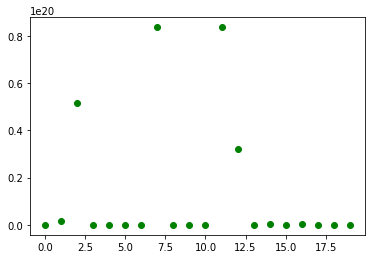

In [78]:
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()